In [327]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [328]:
diabetes=load_diabetes()
x = pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
y = pd.DataFrame(load_diabetes().target, columns=['target'])
y = pd.cut(y['target'], bins=3, labels=[0,1,2])

In [329]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [330]:
print("x_train head: \n",x_train.head(3))
print("y_train head: \n",y_train.head(3))

x_train head: 
           age       sex       bmi        bp        s1        s2        s3  \
332  0.030811 -0.044642  0.104809  0.076958 -0.011201 -0.011335 -0.058127   
307  0.067136  0.050680 -0.030996  0.004658  0.024574  0.035638 -0.028674   
328 -0.038207 -0.044642  0.067085 -0.060756 -0.029088 -0.023234 -0.010266   

           s4        s5        s6  
332  0.034309  0.057108  0.036201  
307  0.034309  0.023371  0.081764  
328 -0.002592 -0.001496  0.019633  
y_train head: 
 332    2
307    1
328    0
Name: target, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [331]:
x_train.shape

(309, 10)

In [332]:
x_train.dtypes

,0
age,float64
sex,float64
bmi,float64
bp,float64
s1,float64
s2,float64
s3,float64
s4,float64
s5,float64
s6,float64


In [333]:
x_train.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [334]:
x_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.000681,0.000089,0.002574,0.003165,0.001450,0.000849,0.000463,0.000080,0.000833,0.002354
std,0.047648,0.047648,0.048387,0.046066,0.048819,0.048053,0.046725,0.047736,0.049027,0.048481
min,-0.107226,-0.044642,-0.090275,-0.100934,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767
25%,-0.034575,-0.044642,-0.033151,-0.033213,-0.033216,-0.029497,-0.032356,-0.039493,-0.033246,-0.030072
50%,0.009016,-0.044642,-0.004050,-0.005670,-0.004321,-0.005072,-0.006584,-0.002592,-0.000612,0.003064
75%,0.034443,0.050680,0.034751,0.039087,0.030078,0.031254,0.030232,0.034309,0.033654,0.032059
max,0.110727,0.050680,0.170555,0.125158,0.152538,0.198788,0.177497,0.185234,0.133597,0.135612


In [335]:
import numpy as np
from collections import Counter

class KNN:
    """
    K-Nearest Neighbors (KNN) classifier implemented from scratch.

    Parameters
    ----------
    k : int, default=3
        Number of nearest neighbors to consider for prediction.

    Attributes
    ----------
    x_train : np.ndarray
        Training feature data.
    y_train : np.ndarray
        Training labels.
    """

    def __init__(self, k=3):
        self.k = k
        self.x_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Fit the KNN model on the training data.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training feature data.
        y : array-like of shape (n_samples,)
            Target labels for training data.
        """
        self.x_train = np.array(X)
        self.y_train = np.array(y).reshape(-1)

    def predict_single(self, x):
        """
        Predict the class label for a single sample.

        Parameters
        ----------
        x : array-like of shape (n_features,)
            A single sample's features.

        Returns
        -------
        label : int or str
            Predicted class label for the sample.
        """
        distances = []
        for i in range(len(self.x_train)):
            dist = np.sqrt(np.sum((x - self.x_train[i])**2))  # Euclidean distance
            distances.append((dist, self.y_train[i]))

        distances.sort(key=lambda x: x[0])
        k_neighbors = [label for (_, label) in distances[:self.k]]

        most_common = Counter(k_neighbors).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        """
        Predict class labels for multiple samples.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        Returns
        -------
        y_pred : np.ndarray of shape (n_samples,)
            Predicted class labels for each test sample.
        """
        X = np.array(X)
        y_pred = [self.predict_single(x) for x in X]
        return np.array(y_pred)


In [336]:

knn = KNN(k=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [337]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy without scaling:", accuracy)

Accuracy without scaling: 0.5263157894736842


In [338]:
#After Scaling

In [339]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)


In [340]:
knn2=KNN(k=5)
knn2.fit(x_train_scaled,y_train)
y_pred2=knn2.predict(x_test_scaled)

In [341]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy with scaling:", accuracy)

Accuracy with scaling: 0.518796992481203


In [342]:
#since the dataset was already scaled scaling didnt make much difference

In [343]:
for k in range(1, 15):
    knn = KNN(k=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k} (before scaling):", accuracy)


Accuracy for k=1 (before scaling): 0.5338345864661654
Accuracy for k=2 (before scaling): 0.5338345864661654
Accuracy for k=3 (before scaling): 0.5639097744360902
Accuracy for k=4 (before scaling): 0.5263157894736842
Accuracy for k=5 (before scaling): 0.5263157894736842
Accuracy for k=6 (before scaling): 0.5488721804511278
Accuracy for k=7 (before scaling): 0.5488721804511278
Accuracy for k=8 (before scaling): 0.5789473684210527
Accuracy for k=9 (before scaling): 0.5939849624060151
Accuracy for k=10 (before scaling): 0.6165413533834586
Accuracy for k=11 (before scaling): 0.6015037593984962
Accuracy for k=12 (before scaling): 0.6390977443609023
Accuracy for k=13 (before scaling): 0.6165413533834586
Accuracy for k=14 (before scaling): 0.631578947368421


In [344]:
for k in range(1, 15):
    knn2 = KNN(k=k)
    knn2.fit(x_train_scaled, y_train)
    y_pred_2 = knn2.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_2)
    print(f"Accuracy for k={k} (after scaling):", accuracy)

Accuracy for k=1 (after scaling): 0.5263157894736842
Accuracy for k=2 (after scaling): 0.5263157894736842
Accuracy for k=3 (after scaling): 0.5714285714285714
Accuracy for k=4 (after scaling): 0.5263157894736842
Accuracy for k=5 (after scaling): 0.518796992481203
Accuracy for k=6 (after scaling): 0.556390977443609
Accuracy for k=7 (after scaling): 0.556390977443609
Accuracy for k=8 (after scaling): 0.5639097744360902
Accuracy for k=9 (after scaling): 0.6015037593984962
Accuracy for k=10 (after scaling): 0.5939849624060151
Accuracy for k=11 (after scaling): 0.6090225563909775
Accuracy for k=12 (after scaling): 0.6165413533834586
Accuracy for k=13 (after scaling): 0.6240601503759399
Accuracy for k=14 (after scaling): 0.6240601503759399


In [345]:
#Problem 3

In [346]:
import time
import matplotlib.pyplot as plt

k_values = range(1, 16)
accuracy_original = []
time_original = []
accuracy_scaled = []
time_scaled = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(x_train, y_train)

    start = time.time()
    y_pred = knn.predict(x_test)
    end = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    elapsed = end - start

    accuracy_original.append(accuracy)
    time_original.append(elapsed)

    print(f"k={k}, Accuracy (original): {accuracy:.4f}, Time: {elapsed:.4f}s")



k=1, Accuracy (original): 0.5338, Time: 0.3095s
k=2, Accuracy (original): 0.5338, Time: 0.3004s
k=3, Accuracy (original): 0.5639, Time: 0.2990s
k=4, Accuracy (original): 0.5263, Time: 0.3132s
k=5, Accuracy (original): 0.5263, Time: 0.2935s
k=6, Accuracy (original): 0.5489, Time: 0.3042s
k=7, Accuracy (original): 0.5489, Time: 0.3085s
k=8, Accuracy (original): 0.5789, Time: 0.2909s
k=9, Accuracy (original): 0.5940, Time: 0.3051s
k=10, Accuracy (original): 0.6165, Time: 0.2970s
k=11, Accuracy (original): 0.6015, Time: 0.3093s
k=12, Accuracy (original): 0.6391, Time: 0.3026s
k=13, Accuracy (original): 0.6165, Time: 0.3034s
k=14, Accuracy (original): 0.6316, Time: 0.3152s
k=15, Accuracy (original): 0.6090, Time: 0.2963s


In [347]:
for k in k_values:
    knn = KNN(k=k)
    knn.fit(x_train_scaled, y_train)  #scaled x_train
    start = time.time()
    y_pred = knn.predict(x_test_scaled)  #scaled x_test
    end = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    elapsed = end - start

    accuracy_scaled.append(accuracy)
    time_scaled.append(elapsed)

    print(f"k={k}, Accuracy (scaled): {accuracy:.4f}, Time: {elapsed:.4f}s")


k=1, Accuracy (scaled): 0.5263, Time: 0.2980s
k=2, Accuracy (scaled): 0.5263, Time: 0.3049s
k=3, Accuracy (scaled): 0.5714, Time: 0.2966s
k=4, Accuracy (scaled): 0.5263, Time: 0.3059s
k=5, Accuracy (scaled): 0.5188, Time: 0.2968s
k=6, Accuracy (scaled): 0.5564, Time: 0.3137s
k=7, Accuracy (scaled): 0.5564, Time: 0.3057s
k=8, Accuracy (scaled): 0.5639, Time: 0.3330s
k=9, Accuracy (scaled): 0.6015, Time: 0.3070s
k=10, Accuracy (scaled): 0.5940, Time: 0.2974s
k=11, Accuracy (scaled): 0.6090, Time: 0.2998s
k=12, Accuracy (scaled): 0.6165, Time: 0.3203s
k=13, Accuracy (scaled): 0.6241, Time: 0.5214s
k=14, Accuracy (scaled): 0.6241, Time: 0.5337s
k=15, Accuracy (scaled): 0.6090, Time: 0.5002s


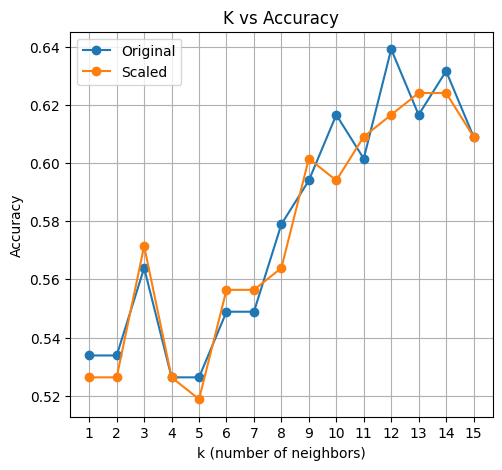

In [348]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(k_values, accuracy_original, marker='o', label='Original')
plt.plot(k_values, accuracy_scaled, marker='o', label='Scaled')
plt.title('K vs Accuracy')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)


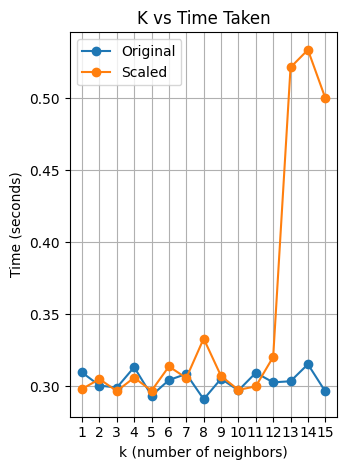

In [349]:
# Time plot
plt.subplot(1,2,2)
plt.plot(k_values, time_original, marker='o', label='Original')
plt.plot(k_values, time_scaled, marker='o', label='Scaled')
plt.title('K vs Time Taken')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Time (seconds)')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [350]:
#Problem 4

In [351]:
#KNN cannot be used for large datasets or high-dimensional data as the input data needs to be exported along with the model which takes up a huge amount of space.
#KNN's speed can be improved by dimensionality reduction as the dimention is reduced.